In [91]:
import numpy as np
import matplotlib.pyplot as plt

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

Let's model 4 complex sinusoids in white gaussian noise.

$$
x(n) = \sum_{k = 1}^K A_k e^{j(n\omega_k + \phi_k)} + w(n)
$$

In [103]:
nvar = 0.5
wk = np.array([[0.2, 0.3, 0.8, 1.2]])
N = 64
R = 10
K = 4
nfft = 1024

rng = np.random.default_rng()

sequence = np.array([np.arange(N)]).T
phases = rng.random((R, K)) * 2 * np.pi
noisesource = (rng.random((R, N)) - 0.5) * np.sqrt(nvar)

bbharmonics = sequence @ wk
print(sequence.shape, wk.shape, noisesource.shape, phases.shape)

(64, 1) (1, 4) (10, 64) (10, 4)


(10, 64)


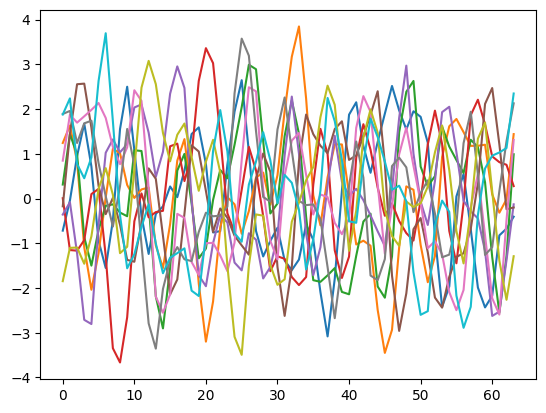

In [104]:
charmonics = np.array([np.exp(1j * (bbharmonics + phases[itr,])) for itr in range(R)])
complexsignal = np.sum(charmonics, axis=-1)
noisysignal = complexsignal + noisesource
plt.plot(noisysignal.T)
print(noisysignal.shape)

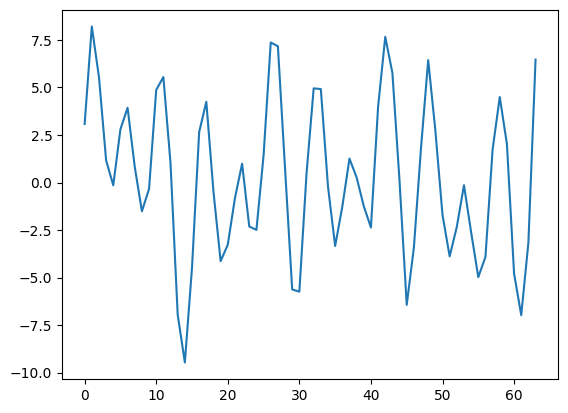

In [105]:
simsignal = np.sum(noisysignal.T, axis=1)
plt.plot(simsignal)

(0.0, 300.0)

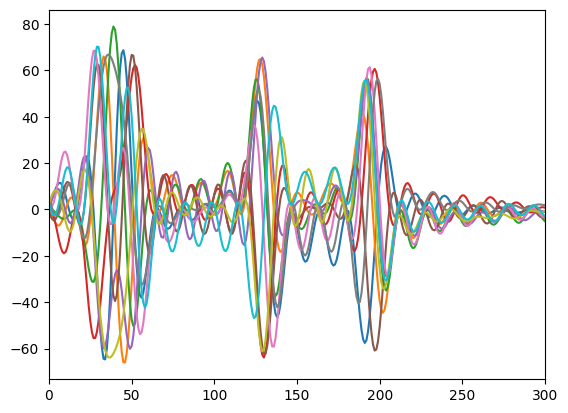

In [108]:
specs = np.fft.fft(noisysignal, nfft, axis=1)
plt.plot((specs.T))
plt.xlim(0, 300)

In [109]:
def complex_exponentials(wk, sig_length, iteration = 10, fs = 1,
                         noise_variance = 0.5, phases = None, nfft = None,
                         zeropad = None, seed=None) -> None:
	pass
